# <p style="text-align: center; font-size: 40px;"> Analysis Of Electricle Vehicle
</p>


## <span style=" font-size: 30px;">I. Project Objectives</span>

The objective of this project is to conduct a comprehensive analysis of the electric vehicle (EV) market using the provided dataset. By examining historical data on EV sales, stock, and market shares across different regions and categories, the project aims to:

**1.Identify Market Trends and Growth Patterns**:
.Analyze the growth trajectory of EV sales and stock over time.
.Determine the adoption rates of EVs in various regions and compare their market penetration.

**2.Assess Market Share and Competitive Positioning**:
.Evaluate the proportion of EVs within the total vehicle stock and new vehicle sales.
.Compare the performance of different powertrain types (EV vs. BEV) in the market.

**3.Evaluate Regional Performance and Opportunities**:
Assess the performance of EV markets in specific regions, such as Australia, and identify regional strengths and weaknesses.
Identify emerging markets with high growth potential for EV adoption.

**4.Analyze the Impact of Categories and Parameters**:
Differentiate between historical and forecasted data to understand past performance and predict future trends.
Examine how different parameters, such as EV stock share and sales share, influence overall market dynamics.

## <span style=" font-size: 30px;">II. Importing Libraries</span>

**1. pandas**: Used for data loading, manipulation, and analysis, especially helpful for reading the Excel, csv file, handling DataFrames, and performing calculations 

**2. numpy**: NumPy (Numerical Python) is a Python library used for working with arrays and performing mathematical and logical operations on them. 

**3. matplotlib.pyplot**: Essential for creating visualizations (bar charts, line plots, pie charts).



In [8]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('libraries loaded successfully')

libraries loaded successfully


In [10]:
dataset=pd.read_csv('Electrical_Vehical_Data_1.csv')
print('Dataset loaded successfully')

Dataset loaded successfully


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765 entries, 0 to 5764
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      5765 non-null   object 
 1   category    5765 non-null   object 
 2   parameter   5765 non-null   object 
 3   mode        5765 non-null   object 
 4   powertrain  5765 non-null   object 
 5   year        5765 non-null   int64  
 6   unit        5765 non-null   object 
 7   value       5765 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 360.4+ KB


In [37]:
dataset.describe()

,year,value
count,5765.000000,5.765000e+03
mean,2019.443192,3.998239e+05
std,5.111332,4.683842e+06
min,2010.000000,1.000000e-03
25%,2016.000000,5.300000e+01
50%,2020.000000,7.700000e+02
75%,2022.000000,1.200000e+04
max,2035.000000,1.800000e+08


In [39]:
print('First 5 rows of data')
dataset.head()

First 5 rows of data


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
2,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
3,Australia,Historical,EV sales,Cars,BEV,2014,Vehicles,370.0
4,Australia,Historical,EV sales,Cars,BEV,2015,Vehicles,760.0


In [41]:
dataset.shape

(5765, 8)

In [43]:
print('last five values')
dataset.tail()

last five values


,region,category,parameter,mode,powertrain,year,unit,value
5760,Europe,Projection-APS,EV sales,Vans,FCEV,2035,Vehicles,44000.0
5761,Europe,Projection-APS,EV sales,Vans,PHEV,2035,Vehicles,8100.0
5762,Europe,Projection-APS,EV sales,Cars,BEV,2035,Vehicles,14000000.0
5763,Europe,Projection-APS,EV sales,Cars,FCEV,2035,Vehicles,28000.0
5764,Europe,Projection-APS,EV sales,Cars,PHEV,2035,Vehicles,35000.0


In [45]:
#list of columns
dataset.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [47]:
#count the number of missing (null) values in each column of a dataset.
print('missing data')
dataset.isnull().sum()

missing data


region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [49]:
dataset.shape

(5765, 8)

In [51]:
dataset["mode"].value_counts()

mode
Cars      2667
Buses     1212
Vans      1183
Trucks     703
Name: count, dtype: int64

In [53]:
dataset["powertrain"].value_counts()

powertrain
BEV     2796
PHEV    1782
FCEV    1187
Name: count, dtype: int64

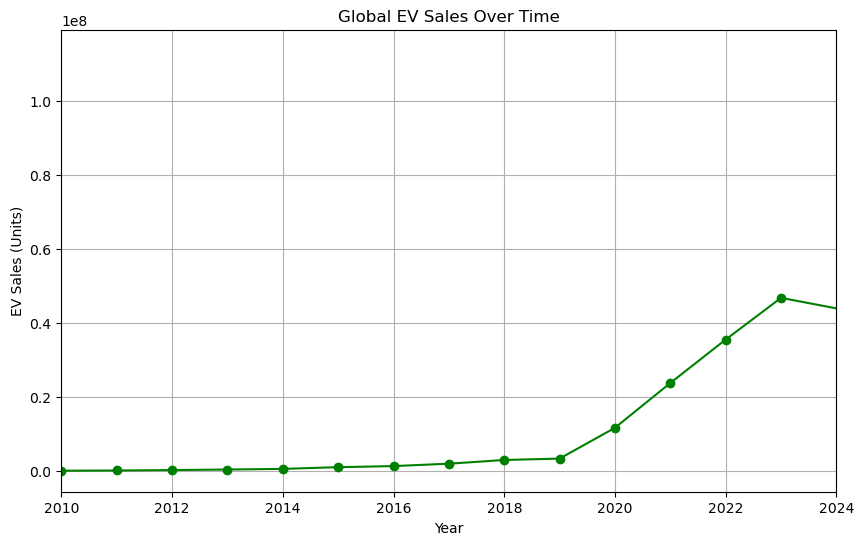

In [18]:
#. Economic Influence on EV Sales (Economic Impact)
#Problem Statement: How do economic factors affect EV sales?
#Visualization: Line plot for EV sales over time to observe economic cycles (e.g., dips during economic recessions).
# Filter data for total EV sales over time (summed across all regions)
ev_sales_over_time = dataset[dataset['parameter'] == 'EV sales']
ev_sales_by_year = ev_sales_over_time.groupby('year')['value'].sum().reset_index()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(ev_sales_by_year['year'], ev_sales_by_year['value'], marker='o', color='green')
plt.xlim(2010, 2024)

plt.xlabel('Year')
plt.ylabel('EV Sales (Units)')
plt.title('Global EV Sales Over Time')
plt.grid(True)
plt.show()


Conclusion: Economic downturns can slow EV sales, as shown by dips in specific years, suggesting a need for targeted economic incentives to sustain EV growth during recessions.

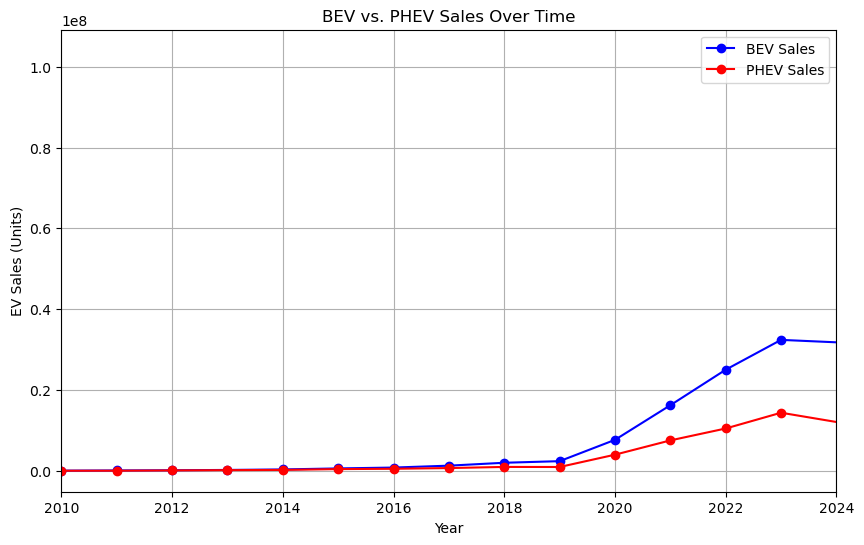

In [59]:
#Technology and Cost Impact on EV Adoption (BEV vs. PHEV Sales Over Time)
#Problem Statement: How have technology advancements and cost reductions impacted EV adoption?
#Visualization: Line plot of BEV vs. PHEV sales over time to see shifts in preference.


# Filter for BEV and PHEV sales data over time
bev_sales = dataset[(dataset['parameter'] == 'EV sales') & (dataset['powertrain'] == 'BEV')]
phev_sales = dataset[(dataset['parameter'] == 'EV sales') & (dataset['powertrain'] == 'PHEV')]

# Summing sales by year for each powertrain type
bev_sales_by_year = bev_sales.groupby('year')['value'].sum().reset_index()
phev_sales_by_year = phev_sales.groupby('year')['value'].sum().reset_index()

# Plotting both on the same graph
plt.figure(figsize=(10, 6))
plt.plot(bev_sales_by_year['year'], bev_sales_by_year['value'], marker='o', color='blue', label='BEV Sales')
plt.plot(phev_sales_by_year['year'], phev_sales_by_year['value'], marker='o', color='red', label='PHEV Sales')
plt.xlim(2010, 2024)
plt.xlabel('Year')
plt.ylabel('EV Sales (Units)')
plt.title('BEV vs. PHEV Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()


Conclusion: BEV sales show significant growth compared to PHEVs, likely due to advancements in battery technology and falling costs, making BEVs increasingly popular over hybrids.

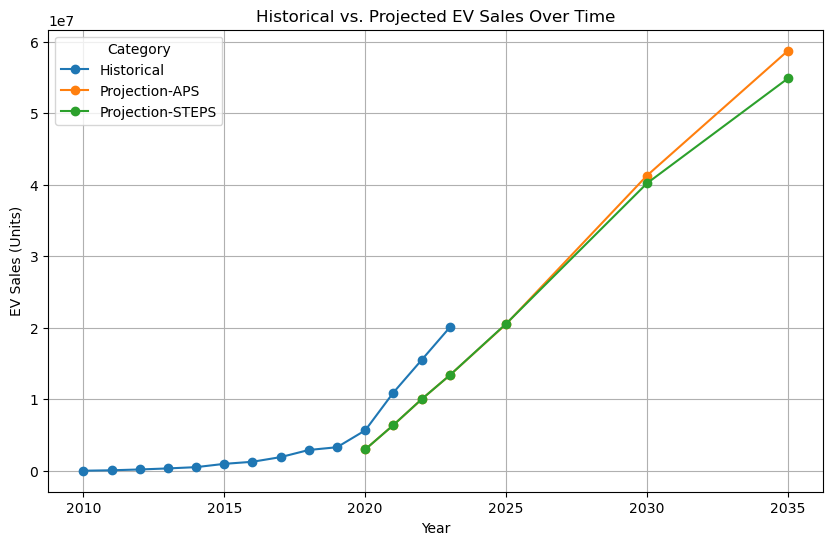

In [65]:
#Problem Statement: How do historical and projected EV sales trends compare, and what does this reveal about actual versus expected growth?
# Filter data for EV sales only
ev_sales_category = dataset[dataset['parameter'] == 'EV sales']

# Group by category and year to get total sales for each, then pivot the data
ev_sales_by_category_year = ev_sales_category.groupby(['category', 'year'])['value'].sum().reset_index()
ev_sales_pivot = ev_sales_by_category_year.pivot(index='year', columns='category', values='value')

# Plot each category column over time
ev_sales_pivot.plot(figsize=(10, 6), marker='o')

plt.xlabel('Year')
plt.ylabel('EV Sales (Units)')
plt.title('Historical vs. Projected EV Sales Over Time')
plt.grid(True)
plt.legend(title='Category')
plt.show()


x1

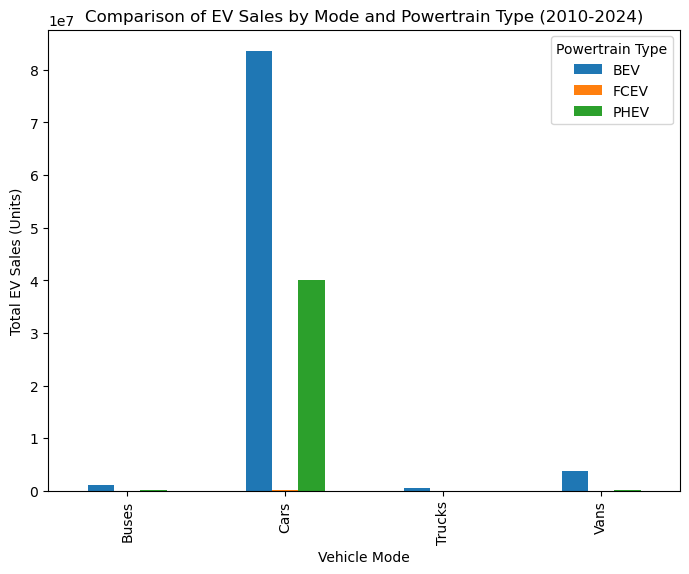

In [20]:
#How have EV sales varied by mode and powertrain type from 2010 to 2024, and which combinations are the most popular?

# Filter data for EV sales by mode and powertrain between 2010 and 2024
ev_sales_mode_powertrain = dataset[(dataset['parameter'] == 'EV sales') & (dataset['year'] >= 2010) & (dataset['year'] <= 2024)]

# Group by mode and powertrain, then sum the sales values
mode_powertrain_sales = ev_sales_mode_powertrain.groupby(['mode', 'powertrain'])['value'].sum().unstack()

# Create grouped bar chart
mode_powertrain_sales.plot(kind='bar', figsize=(7, 6))
plt.xlabel('Vehicle Mode')
plt.ylabel('Total EV Sales (Units)')
plt.title('Comparison of EV Sales by Mode and Powertrain Type (2010-2024)')
plt.legend(title='Powertrain Type')
plt.tight_layout()
plt.show()


The grouped bar chart for 2010-2024 reveals the sales distribution across different modes and powertrain types. This comparison shows where demand has been strongest, such as a potential dominance of passenger BEVs, indicating consumer trends and areas where manufacturers and policymakers have successfully driven EV adoption.

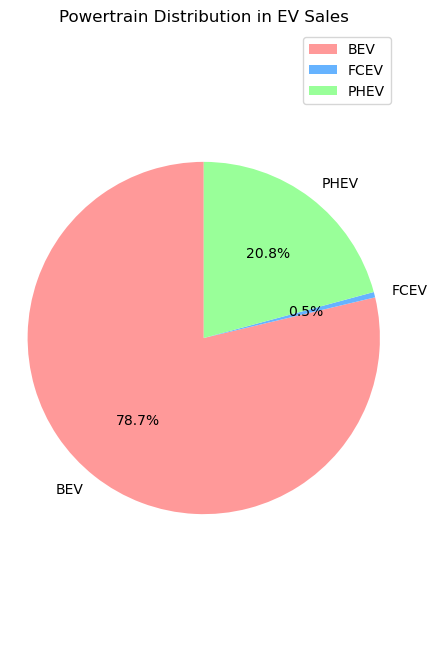

In [29]:
#Problem Statement: What is the percentage distribution of different powertrain types in EV sales?
# Group the data by powertrain and calculate the sum of values for each powertrain category
powertrain_data = dataset.groupby('powertrain')['value'].sum()

# Calculate the percentage contribution of each powertrain category
powertrain_percentage = (powertrain_data / powertrain_data.sum()) * 100


plt.figure(figsize=(5, 8))
plt.pie(powertrain_percentage, labels=powertrain_percentage.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Powertrain Distribution in EV Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.legend()
plt.show()


Conclusion: The pie chart shows the market share of each powertrain type, with certain powertrains dominating EV sales.

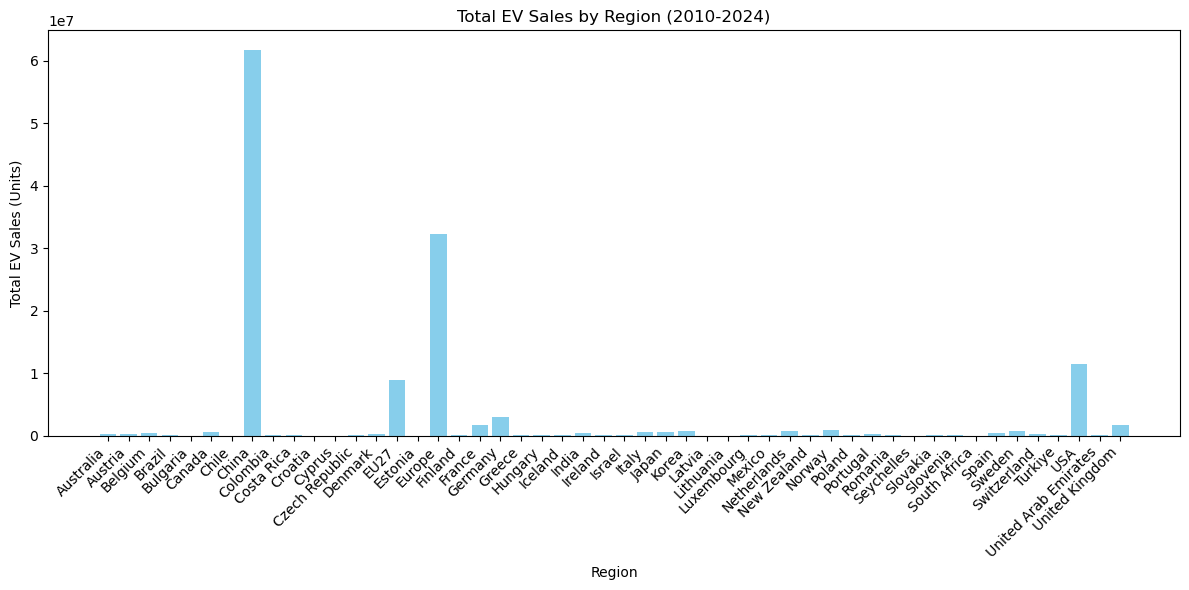

In [71]:
##How does EV adoption vary across different regions, and which regions have the highest total EV sales from 2010 to 2024?
ev_sales_region = dataset[
    (dataset['parameter'] == 'EV sales') & 
    (dataset['year'] >= 2010) & 
    (dataset['year'] <= 2024) & 
    (dataset['region'] != 'World')
]

# Group by region and sum the sales values
region_sales = ev_sales_region.groupby('region')['value'].sum()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(region_sales.index, region_sales.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total EV Sales (Units)')
plt.title('Total EV Sales by Region (2010-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart, which excludes the World region, provides a clearer comparison of EV sales among individual regions. It highlights regional leaders in EV adoption, allowing us to see where EV market penetration is strongest and where there may be room for growth.

Conclusion:This insight allows manufacturers to innovate and improve EV technology, helps investors recognize growth opportunities, and supports policymakers in promoting sustainable transportation solutions. Overall, the analysis can drive informed decisions that accelerate the transition to electric mobility while addressing consumer and environmental needs.